In [1]:
    import numpy as np
    import pandas as pd 
    import matplotlib
    import seaborn as sns


    from sklearn.preprocessing import MinMaxScaler

In [3]:
conda install -c pyviz holoviews bokeh

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\abhhi\anaconda3

  added / updated specs:
    - bokeh
    - holoviews


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                4.9.1-py37haa95532_0 --> 4.9.2-py37haa95532_0




conda-4.9.2          | 2.9 MB    |            |   0% 
conda-4.9.2          | 2.9 MB    |            |   1% 
conda-4.9.2          | 2.9 MB    | #####6     |  57% 
conda-4.9.2          | 2.9 MB    | ########## | 100% 
conda-4.9.2          | 2.9 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing 

In [3]:
import holoviews as hv
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3


In [5]:
conda install -c conda-forge hyperopt

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\abhhi\anaconda3

  added / updated specs:
    - hyperopt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py37haa95532_0 --> conda-forge::conda-4.9.2-py37h03978a9_0




conda-4.9.2          | 3.0 MB    |            |   0% 
conda-4.9.2          | 3.0 MB    |            |   1% 
conda-4.9.2          | 3.0 MB    | ##8        |  29% 
conda-4.9.2          | 3.0 MB    | #######2   |  72% 
conda-4.9.2          | 3.0 MB    | ########## | 100% 
conda-4.9.2          | 3.0 MB    | ########

In [4]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.utils import resample,shuffle


from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import minmax_scaling
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF
from holoviews import opts
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve, auc
hv.extension('bokeh')


In [6]:
df = pd.read_csv('C:/Data mining/Proj/train.csv')

In [7]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 381109, number of features: 12


In [37]:
df.isnull()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
##counting the number of na values in data frame
df.isnull().sum(axis = 0)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)
df=df.set_index("id")


C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

df.head()



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
CategoricalVariables

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [13]:
###hot enocoding

Gender_Age_Map  = {'Male':1,'Female':0}

df['Gender'] = df['Gender'].map(Gender_Age_Map)

Vehicle_Damage_Age_Map  = {'Yes':1,'No':0}

df['Vehicle_Damage'] = df['Vehicle_Damage'].map(Vehicle_Damage_Age_Map)


df=pd.get_dummies(df,drop_first=True)
df.head()



In [14]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [16]:
df=df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_less_than_1_Year", "Vehicle_Age_> 2 Years": 
                      "Vehicle_Age_greater_than_2_Years"})
df['Vehicle_Age_less_than_1_Year']=df['Vehicle_Age_less_than_1_Year'].astype('int')
df['Vehicle_Age_greater_than_2_Years']=df['Vehicle_Age_greater_than_2_Years'].astype('int')

df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [19]:
####visualization

In [20]:
df_vis = pd.read_csv('C:/Data mining/Proj/train.csv')
cols=['Driving_License','Previously_Insured','Response']
for col in cols:
    df_vis[col] = df_vis[col].map({0:'No',1:'Yes'})

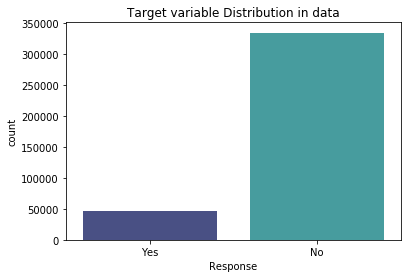

In [21]:
###response visualization

sns.countplot(df_vis['Response'],palette='mako')
plt.title("Target variable Distribution in data");

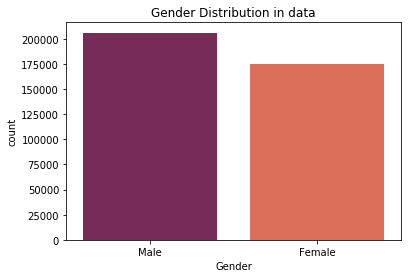

In [19]:
##gender distribution

sns.countplot(df_vis['Gender'],palette='rocket')
plt.title("Gender Distribution in data");

Age distribution according to Response


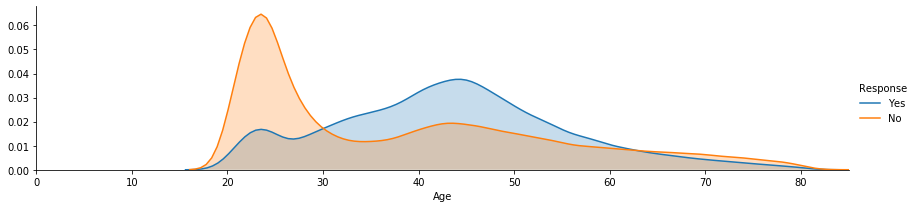

In [20]:
####Age distribution


print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_vis,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df_vis["Age"].max()))
facetgrid.add_legend();

In [21]:
pd.crosstab(df_vis['Response'], df_vis['Driving_License'])

Driving_License,No,Yes
Response,,
No,771,333628
Yes,41,46669


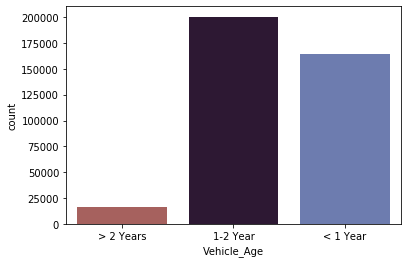

In [76]:
sns.countplot(df_vis.Vehicle_Age, palette='twilight_r')

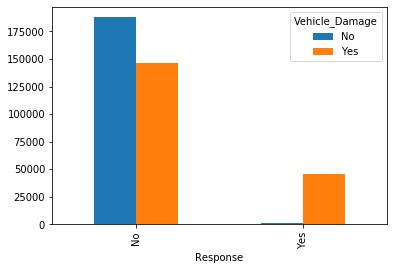

In [77]:
pd.crosstab(df_vis['Response'], df_vis['Vehicle_Damage']).plot(kind='bar');

Policy_Sales_Channel distribution according to Response


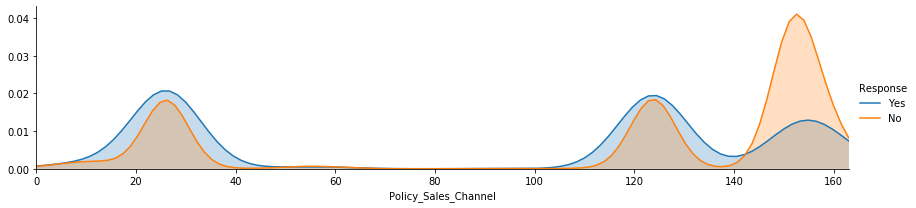

In [78]:
print("Policy_Sales_Channel distribution according to Response")
facetgrid = sns.FacetGrid(df_vis,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Policy_Sales_Channel",shade = True)
facetgrid.set(xlim = (0,df_vis["Policy_Sales_Channel"].max()))
facetgrid.add_legend();

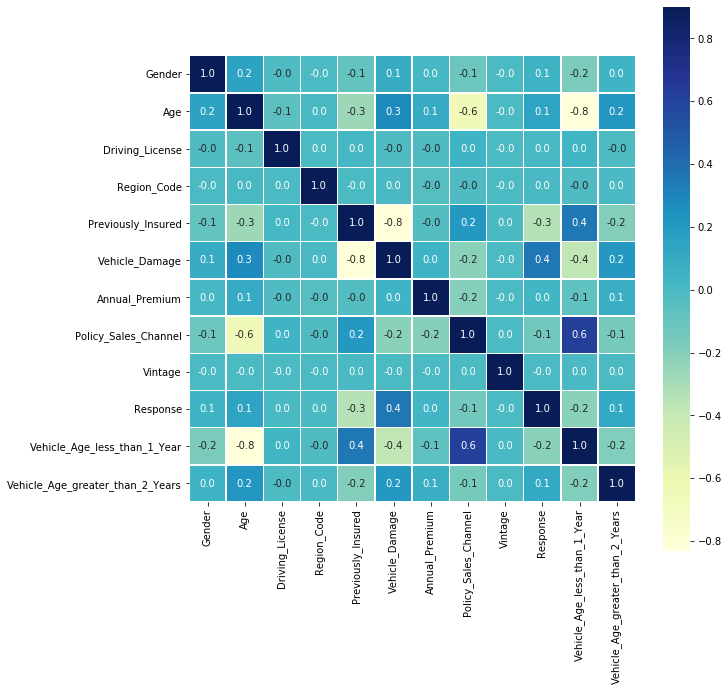

In [17]:
SpearmanCorr = df.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3,cmap="YlGnBu", fmt='.1f')

In [18]:
from mlxtend.preprocessing import minmax_scaling

df_scale = minmax_scaling(df, columns=df.columns)

In [19]:
df_scale.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,1.0,0.0,1.0
2,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,0.0,0.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,1.0,0.0,1.0
4,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,0.0,1.0,0.0
5,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,0.0,1.0,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_scale.drop(['Response'], axis = 1), 
                                df_scale['Response'], test_size = 0.2,random_state = 789)

In [21]:
print(f"Target variable disribution in train set: \n{y_train.value_counts()}\n\nand in test set: \n{y_test.value_counts()}")

Target variable disribution in train set: 
0.0    267521
1.0     37366
Name: Response, dtype: int64

and in test set: 
0.0    66878
1.0     9344
Name: Response, dtype: int64


In [87]:
#knn start
from sklearn.neighbors import KNeighborsClassifier

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

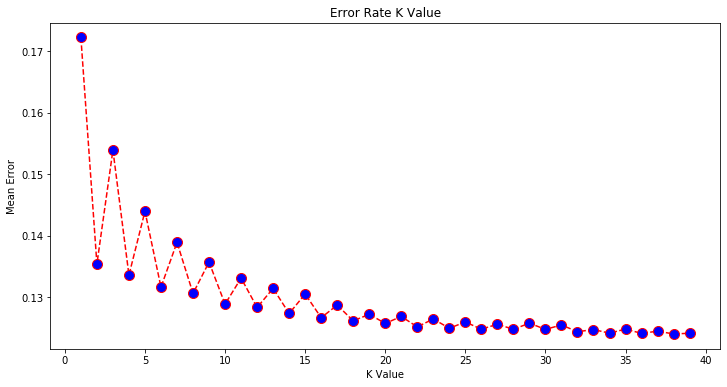

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [50]:
classifier=KNeighborsClassifier(n_neighbors=39)

classifier.fit(X_train,y_train)

y_pred= classifier.predict(X_test) 

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [33]:
#####logistic Regression before sampling and fs

logisticRegression = LogisticRegression(max_iter = 100)
GLM_fit=logisticRegression.fit(X_train, y_train)
GLM_clas = pd.DataFrame(GLM_fit.predict(X_test))
GLM_probability = pd.DataFrame(GLM_fit.predict_proba(X_test))

predictions = logisticRegression.predict(X_test)
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}
\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

Accuracy score is 88.0
ROC-AUC score is 50.0


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     66878
         1.0       0.00      0.00      0.00      9344

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



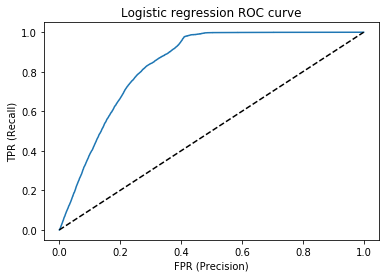

Area under curve (AUC):  0.83693


In [35]:
fpr, tpr, _ = roc_curve(y_test, GLM_fit.predict_proba(X_test)[:,1])

plt.title('Logistic regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [41]:
#####Random forest before sampling and fs
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc_fit=rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(f"Accuracy score is {100*accuracy_score(y_test,rfc_pred).round(2)}
\nROC-AUC score is {100*roc_auc_score(y_test,rfc_pred).round(2)}")

Accuracy score is 87.0
ROC-AUC score is 55.00000000000001


In [38]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     66878
         1.0       0.37      0.12      0.19      9344

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222



In [39]:
rfc_preds = rfc.predict_proba(X_test)
print("AUC score after taking probabilities predictions and not classes predictions is")
roc_auc_score(y_test, rfc_preds[:,1], average = 'weighted')

AUC score after taking probabilities predictions and not classes predictions is


0.839209631890281

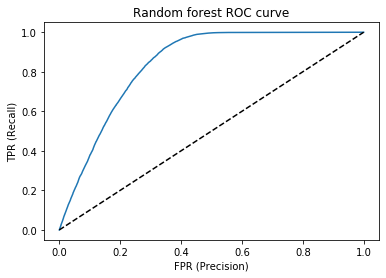

Area under curve (AUC):  0.83943


In [42]:
fpr, tpr, _ = roc_curve(y_test, rfc_fit.predict_proba(X_test)[:,1])

plt.title('Random forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [44]:
#####XG Boost before sampling and fs
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_fit=xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(f"Accuracy score is {100*accuracy_score(y_test,xgb_pred).round(2)}
\nROC-AUC score is {100*roc_auc_score(y_test,xgb_pred).round(2)}")

Accuracy score is 88.0
ROC-AUC score is 51.0


In [46]:
xgb_preds = xgb.predict_proba(X_test)
roc_auc_score(y_test, xgb_preds[:,1], average = 'weighted')

0.8559786322285581

In [49]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     66878
         1.0       0.46      0.02      0.05      9344

    accuracy                           0.88     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.88      0.83     76222



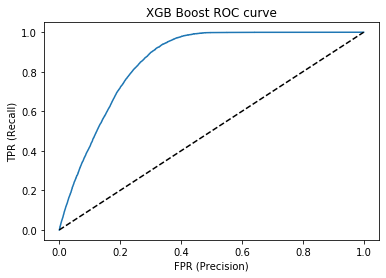

Area under curve (AUC):  0.85598


In [47]:
fpr, tpr, _ = roc_curve(y_test, xgb_fit.predict_proba(X_test)[:,1])

plt.title('XGB Boost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [76]:
from sklearn import tree

model= tree.DecisionTreeClassifier(random_state=456)

model.fit(X_train, y_train)

Prediction_for_DT = model.predict(X_test)
print(f"Accuracy score is {100*accuracy_score(y_test,Prediction_for_DT).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,Prediction_for_DT).round(2)}")

Accuracy score is 82.0
ROC-AUC score is 60.0


In [74]:
print(classification_report(y_test, Prediction_for_DT))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     66878
         1.0       0.29      0.31      0.30      9344

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



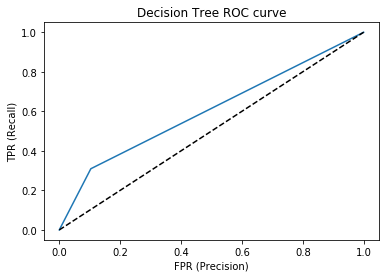

Area under curve (AUC):  0.60294


In [75]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [47]:
fs_inputs=df_scale.drop(['Response'],axis=1)
fs_target=df_scale['Response']

fs_inputs.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,0.0,1.0
2,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,0.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,0.0,1.0
4,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,1.0,0.0
5,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,1.0,0.0


In [48]:
###Feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [24]:
cv=KFold(n_splits=10,shuffle=False)
classifier_pipeline= make_pipeline(RandomForestClassifier(n_estimators=10, n_jobs=-1))

In [26]:
# Build step forward feature selection
sfsl = SFS(classifier_pipeline,
           k_features=11,
           forward=True,
           scoring='accuracy',
           cv=cv)

# Perform SFFS
sfsl.fit(fs_inputs, fs_target)
sfsl.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.87830285, 0.87420955, 0.8780667 , 0.87956233, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88087116]),
  'avg_score': 0.8774366478737436,
  'feature_names': ('Gender',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.87830285, 0.87420955, 0.8780667 , 0.87956233, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88087116]),
  'avg_score': 0.8774366478737436,
  'feature_names': ('Gender', 'Age')},
 3: {'feature_idx': (0, 1, 10),
  'cv_scores': array([0.87832909, 0.87420955, 0.87809294, 0.87958857, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88084492]),
  'avg_score': 0.8774418956336033,
  'feature_names': ('Gender', 'Age', 'Vehicle_Age_greater_than_2_Years')},
 4: {'feature_idx': (0, 1, 5, 10),
  'cv_scores': array([0.87832909, 0.87420955, 0.8780667 , 0.87958857, 0.87683346,
         0.8769909 , 0.8744457 , 0.87790927, 0.87712209, 0.88084492]),
  'avg_score': 

In [54]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,0.0,1.0
2,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,0.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,0.0,1.0
4,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,1.0,0.0
5,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,1.0,0.0


In [55]:
X_fs=df_scale.drop(['Region_Code','Annual_Premium','Vintage'],axis=1)



In [27]:
cv=KFold(n_splits=10,shuffle=False)
classifier_pipeline= make_pipeline(RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [28]:
sfsl = SFS(classifier_pipeline,
           k_features=11,
           forward=True,
           scoring='accuracy',
           cv=cv)

# Perform SFFS
sfsl.fit(fs_inputs, fs_target)
sfsl.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.87830285, 0.87420955, 0.8780667 , 0.87956233, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88087116]),
  'avg_score': 0.8774366478737436,
  'feature_names': ('Gender',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.87830285, 0.87420955, 0.8780667 , 0.87956233, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88087116]),
  'avg_score': 0.8774366478737436,
  'feature_names': ('Gender', 'Age')},
 3: {'feature_idx': (0, 1, 10),
  'cv_scores': array([0.87830285, 0.87420955, 0.87809294, 0.87958857, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87712209, 0.88084492]),
  'avg_score': 0.8774392717192478,
  'feature_names': ('Gender', 'Age', 'Vehicle_Age_greater_than_2_Years')},
 4: {'feature_idx': (0, 1, 4, 10),
  'cv_scores': array([0.87830285, 0.87420955, 0.87809294, 0.87958857, 0.8768597 ,
         0.87701713, 0.8744457 , 0.87790927, 0.87709585, 0.88084492]),
  'avg_score': 

In [49]:
cv=KFold(n_splits=10,shuffle=False)
classifier_pipeline= make_pipeline(RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [52]:
sfsl = SFS(classifier_pipeline,
           k_features=1,
           forward=False,
           scoring='accuracy',
           cv=cv)

# Perform SFFS
sfsl.fit(fs_inputs, fs_target)
sfsl.subsets_

{11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.86702002, 0.86177219, 0.86641652, 0.86985385, 0.8669413 ,
         0.86494713, 0.86436987, 0.86636404, 0.86607541, 0.87071635]),
  'avg_score': 0.866447667907815,
  'feature_names': ('Gender',
   'Age',
   'Driving_License',
   'Region_Code',
   'Previously_Insured',
   'Vehicle_Damage',
   'Annual_Premium',
   'Policy_Sales_Channel',
   'Vintage',
   'Vehicle_Age_less_than_1_Year',
   'Vehicle_Age_greater_than_2_Years')},
 10: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8, 9, 10),
  'cv_scores': array([0.86597045, 0.86297919, 0.86610165, 0.86969641, 0.86486841,
         0.86523576, 0.86473721, 0.86652148, 0.86591798, 0.87066387]),
  'avg_score': 0.8662692415939433,
  'feature_names': ('Gender',
   'Age',
   'Driving_License',
   'Region_Code',
   'Previously_Insured',
   'Annual_Premium',
   'Policy_Sales_Channel',
   'Vintage',
   'Vehicle_Age_less_than_1_Year',
   'Vehicle_Age_greater_than_2_Years')},
 9: {'f

In [27]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,0.0,1.0
2,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,0.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,0.0,1.0
4,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,1.0,0.0
5,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,1.0,0.0


In [90]:
#Y.head()

id
1    1
2    0
3    1
4    0
5    0
Name: Response, dtype: int64

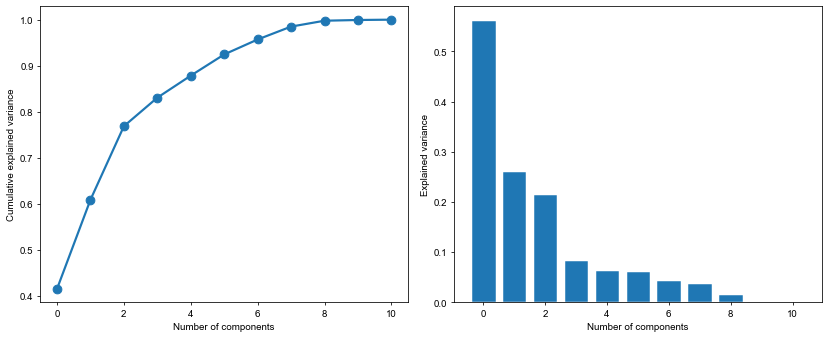

In [26]:
pca = PCA().fit(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(X.shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()

In [27]:
n_PCA_90 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.9) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.9)
print("Already: " + format(n_PCA_90) + " components cover 90% of variance.")

Already: 5 components cover 90% of variance.


C:\Users\abhhi\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


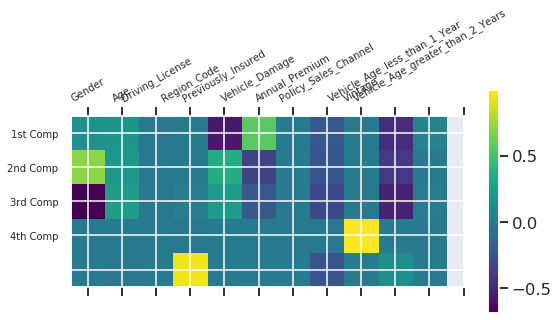

In [28]:
pca = PCA(5).fit(X)


X_pca=pca.transform(X) 

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp'],fontsize=10)
plt.colorbar()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],X,fontsize=10,rotation=30)
plt.tight_layout()
plt.show()

In [40]:
X_pca.

array([[ 1.0279282 ,  0.31436732, -0.09249167,  0.22186237,  0.11230878],
       [ 0.46454315,  0.742093  ,  0.21285421,  0.10556585, -0.38129302],
       [ 1.03734548,  0.32395429, -0.08237807, -0.43551559,  0.10638472],
       ...,
       [-0.91227113,  0.33456852, -0.54277837,  0.02205252,  0.08755596],
       [ 0.79328805, -0.46414384,  0.48952523, -0.27555125, -0.31165931],
       [ 0.38654662,  0.6562297 ,  0.11302414,  0.28733589,  0.10834381]])

In [29]:
PCA_vars = [0]*len(X)

for i, feature in zip(range(len (X)),X):
    x = ExtractColumn(pca.components_[0],i)
    if ((max(x) > 0.4) | (min(x) < -0.4)):
        if abs(max(x)) > abs(min(x)):
            PCA_vars[i] = max(x)
        else:
            PCA_vars[i] = min(x)                 
    else:
        PCA_vars[i] = 0

PCA_vars = pd.DataFrame(list(zip(X,PCA_vars)),columns=('Name','Max absolute contribution'),index=range(1,13,1))      
PCA_vars = PCA_vars[(PCA_vars['Max absolute contribution']!=0)]
PCA_vars

NameError: name 'ExtractColumn' is not defined

In [22]:
####sampling
df_scale.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,1.0,0.0,1.0
2,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,0.0,0.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,1.0,0.0,1.0
4,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,0.0,1.0,0.0
5,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,0.0,1.0,0.0


In [23]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(df_scale.drop(['Response'], axis = 1), df_scale['Response'], test_size = 0.2,random_state = 789)

In [24]:
print(f"Target variable disribution in train set: \n{y_train_fs.value_counts()}\n\nand in test set: \n{y_test_fs.value_counts()}")

Target variable disribution in train set: 
0.0    267521
1.0     37366
Name: Response, dtype: int64

and in test set: 
0.0    66878
1.0     9344
Name: Response, dtype: int64


In [25]:
#combining train features and target
####Sampling
df_fs = pd.concat([X_train_fs,y_train_fs],axis=1)

from sklearn.utils import resample,shuffle
df_majority = df_fs[df_fs['Response']==0]
df_minority = df_fs[df_fs['Response']==1]
df_minority_upsampled = resample(df_minority,replace=True,
                                 n_samples=y_train_fs.value_counts()[0],random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1.0    267521
0.0    267521
Name: Response, dtype: int64

In [26]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535042 entries, 273127 to 373841
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            535042 non-null  float64
 1   Age                               535042 non-null  float64
 2   Driving_License                   535042 non-null  float64
 3   Region_Code                       535042 non-null  float64
 4   Previously_Insured                535042 non-null  float64
 5   Vehicle_Damage                    535042 non-null  float64
 6   Annual_Premium                    535042 non-null  float64
 7   Policy_Sales_Channel              535042 non-null  float64
 8   Vintage                           535042 non-null  float64
 9   Vehicle_Age_less_than_1_Year      535042 non-null  float64
 10  Vehicle_Age_greater_than_2_Years  535042 non-null  float64
 11  Response                          535042 non-nu

In [27]:
print('Number of rows: '+ format(balanced_df.shape[0]) +', number of features: '+ format(balanced_df.shape[1]))

Number of rows: 535042, number of features: 12


In [28]:
X_train_sampling=balanced_df.drop(['Response'],axis=1)
Y_train_sampling=balanced_df['Response']

X_train_sampling.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,
273127,0.0,0.584615,1.0,0.711538,0.0,0.0,0.061304,0.956790,0.176471,0.0,0.0
101245,1.0,0.430769,1.0,0.153846,0.0,1.0,0.051708,0.759259,0.986159,0.0,0.0
24766,0.0,0.415385,1.0,0.538462,0.0,1.0,0.033149,1.000000,0.301038,0.0,0.0
53196,1.0,0.353846,1.0,0.980769,0.0,1.0,0.000000,0.962963,0.951557,0.0,0.0
351632,1.0,0.400000,1.0,0.538462,0.0,1.0,0.069495,0.209877,0.169550,0.0,0.0


In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sampling, Y_train_sampling)
    pred_i = knn.predict(X_test_fs)
    error.append(np.mean(pred_i != y_test_fs))

Text(0, 0.5, 'Mean Error')

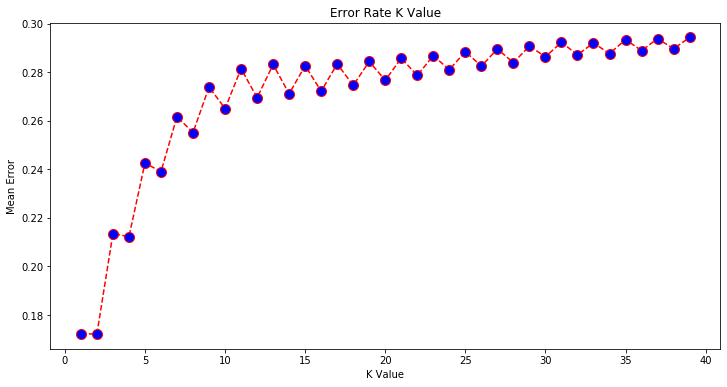

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=39)

classifier.fit(X_train_sampling, Y_train_sampling)

y_pred = classifier.predict(X_test_fs) 

In [52]:
print(classification_report(y_test_fs, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80     66878
         1.0       0.28      0.88      0.42      9344

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.61     76222
weighted avg       0.89      0.71      0.76     76222



In [60]:
###logistic after sampling
logisticRegression = LogisticRegression(max_iter = 10000)
GLM_fit_sampling=logisticRegression.fit(X_train_sampling, Y_train_sampling)
GLM_clas = pd.DataFrame(GLM_fit_sampling.predict(X_test_fs))
GLM_probability = pd.DataFrame(GLM_fit_sampling.predict_proba(X_test_fs))

predictions = logisticRegression.predict(X_test_fs)

In [61]:
    print(f"Accuracy score is {100*accuracy_score(y_test_fs,predictions).round(2)}
    \nROC-AUC score is {100*roc_auc_score(y_test_fs,predictions).round(2)}")

Accuracy score is 64.0
ROC-AUC score is 78.0


In [63]:
print(classification_report(y_test_fs,predictions ))

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     66878
         1.0       0.25      0.97      0.40      9344

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



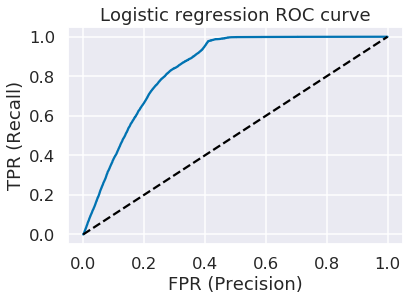

Area under curve (AUC):  0.83693


In [38]:
fpr, tpr, _ = roc_curve(y_test, GLM_fit.predict_proba(X_test)[:,1])

plt.title('Logistic regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [62]:
###random Forest after sampling
rfc = RandomForestClassifier(n_estimators=100)
rfc_fit=rfc.fit(X_train_sampling, Y_train_sampling)
rfc_pred = rfc.predict(X_test_fs)
print(f"Accuracy score is {100*accuracy_score(y_test_fs,rfc_pred).round(2)}
\nROC-AUC score is {100*roc_auc_score(y_test_fs,rfc_pred).round(2)}")

Accuracy score is 85.0
ROC-AUC score is 60.0


In [64]:
rfc_preds = rfc.predict_proba(X_test_fs)
print("AUC score after taking probabilities predictions and not classes predictions is")
roc_auc_score(y_test_fs, rfc_preds[:,1], average = 'weighted')

AUC score after taking probabilities predictions and not classes predictions is


0.8337315585983699

In [65]:
print(classification_report(y_test_fs,rfc_pred ))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     66878
         1.0       0.34      0.27      0.30      9344

    accuracy                           0.85     76222
   macro avg       0.62      0.60      0.61     76222
weighted avg       0.83      0.85      0.84     76222



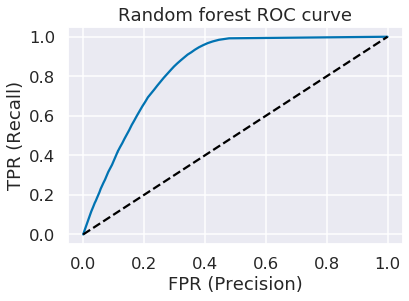

Area under curve (AUC):  0.83595


In [49]:
fpr, tpr, _ = roc_curve(y_test, rfc_fit.predict_proba(X_test)[:,1])

plt.title('Random forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
##XGB classisfier
xgb = XGBClassifier()
xgb_fit=xgb.fit(X_train_sampling, Y_train_sampling)
xgb_pred = xgb.predict(X_test_fs)
print(f"Accuracy score is {100*accuracy_score(y_test_fs,xgb_pred).round(2)}
\nROC-AUC score is {100*roc_auc_score(y_test_fs,xgb_pred).round(2)}")

Accuracy score is 71.0
ROC-AUC score is 80.0


In [67]:
xgb_preds = xgb.predict_proba(X_test_fs)
roc_auc_score(y_test_fs, xgb_preds[:,1], average = 'weighted')

0.8551972700520515

In [68]:
print(classification_report(y_test_fs,xgb_pred ))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     66878
         1.0       0.29      0.91      0.44      9344

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



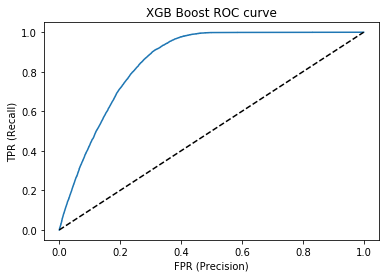

Area under curve (AUC):  0.8552


In [69]:
fpr, tpr, _ = roc_curve(y_test_fs, xgb_fit.predict_proba(X_test_fs)[:,1])

plt.title('XGB Boost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [80]:
####decision treee after sampling
model= tree.DecisionTreeClassifier(random_state=456)

model.fit(X_train_sampling, Y_train_sampling)

Prediction_for_DT = model.predict(X_test_fs)

print(f"Accuracy score is {100*accuracy_score(y_test_fs,Prediction_for_DT).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test_fs,Prediction_for_DT).round(2)}")


Accuracy score is 83.0
ROC-AUC score is 60.0


In [78]:
print(classification_report(y_test_fs,Prediction_for_DT ))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     66878
         1.0       0.30      0.29      0.29      9344

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



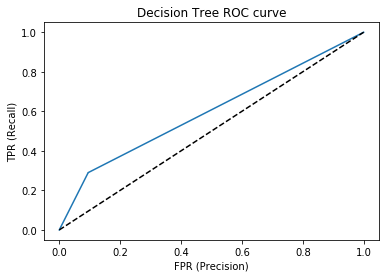

Area under curve (AUC):  0.59744


In [81]:

fpr, tpr, _ = roc_curve(y_test_fs, model.predict_proba(X_test_fs)[:,1])

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [29]:
#####Feature selection
#########

X_train_fs1=X_train_sampling.drop(['Region_Code','Annual_Premium','Vintage'],axis=1)
X_test_fs1=X_test_fs.drop(['Region_Code','Annual_Premium','Vintage'],axis=1)

X_train_fs1.head()



,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,
273127,0.0,0.584615,1.0,0.0,0.0,0.956790,0.0,0.0
101245,1.0,0.430769,1.0,0.0,1.0,0.759259,0.0,0.0
24766,0.0,0.415385,1.0,0.0,1.0,1.000000,0.0,0.0
53196,1.0,0.353846,1.0,0.0,1.0,0.962963,0.0,0.0
351632,1.0,0.400000,1.0,0.0,1.0,0.209877,0.0,0.0


In [53]:
###logistic after sampling and fs
logisticRegression = LogisticRegression(max_iter = 10000)
GLM_fit_sampling=logisticRegression.fit(X_train_fs1, Y_train_sampling)
GLM_clas = pd.DataFrame(GLM_fit_sampling.predict(X_test_fs1))
GLM_probability = pd.DataFrame(GLM_fit_sampling.predict_proba(X_test_fs1))

predictions = logisticRegression.predict(X_test_fs1)

In [57]:
print(f"Accuracy score is {100*accuracy_score(y_test_fs,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test_fs,predictions).round(2)}")}

SyntaxError: invalid syntax (<ipython-input-57-fd8332ed5488>, line 1)

In [58]:
print(classification_report(y_test_fs,predictions ))

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     66878
         1.0       0.25      0.97      0.40      9344

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [63]:
X_test_fs.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_less_than_1_Year,Vehicle_Age_greater_than_2_Years
id,,,,,,,,,,,
333385,1.0,0.707692,1.0,0.884615,0.0,1.0,0.044520,0.154321,0.411765,0.0,1.0
44176,0.0,0.323077,1.0,0.500000,1.0,0.0,0.049254,0.129630,0.031142,0.0,0.0
308376,0.0,0.692308,1.0,0.538462,1.0,0.0,0.000000,0.759259,0.024221,0.0,0.0
136926,0.0,0.092308,1.0,0.038462,1.0,0.0,0.067160,0.932099,0.705882,1.0,0.0
268328,1.0,0.200000,1.0,0.961538,0.0,1.0,0.068014,0.179012,0.889273,0.0,0.0


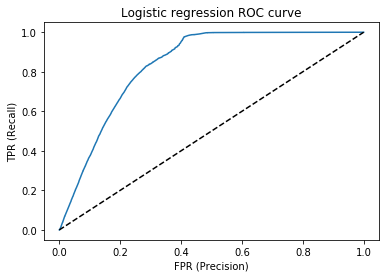

Area under curve (AUC):  0.83612


In [64]:
fpr, tpr, _ = roc_curve(y_test_fs, GLM_fit_sampling.predict_proba(X_test_fs1)[:,1])

plt.title('Logistic regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_fit=xgb.fit(X_train_fs1, Y_train_sampling)
xgb_pred = xgb.predict(X_test_fs1)
print(f"Accuracy score is {100*accuracy_score(y_test_fs,xgb_pred).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test_fs,xgb_pred).round(2)}")

Accuracy score is 71.0
ROC-AUC score is 80.0


In [68]:
print(classification_report(y_test_fs,xgb_pred ))

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80     66878
         1.0       0.28      0.91      0.43      9344

    accuracy                           0.71     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



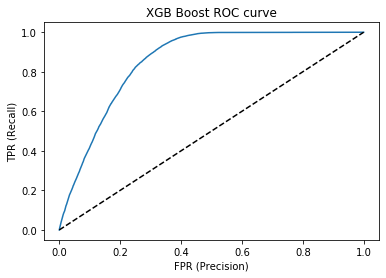

Area under curve (AUC):  0.85434


In [69]:
fpr, tpr, _ = roc_curve(y_test_fs, xgb_fit.predict_proba(X_test_fs1)[:,1])

plt.title('XGB Boost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc_fit=rfc.fit(X_train_fs1, Y_train_sampling)
rfc_pred = rfc.predict(X_test_fs1)
print(f"Accuracy score is {100*accuracy_score(y_test_fs,rfc_pred).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test_fs,rfc_pred).round(2)}")

Accuracy score is 72.0
ROC-AUC score is 79.0


In [77]:
print(classification_report(y_test_fs,rfc_pred ))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     66878
         1.0       0.29      0.88      0.43      9344

    accuracy                           0.72     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.72      0.76     76222



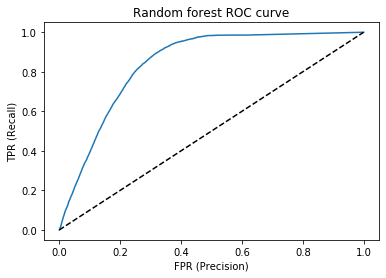

Area under curve (AUC):  0.84028


In [72]:
fpr, tpr, _ = roc_curve(y_test_fs, rfc_fit.predict_proba(X_test_fs1)[:,1])

plt.title('Random forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [83]:
##decision tree after fs

model= tree.DecisionTreeClassifier(random_state=456)

model.fit(X_train_fs1, Y_train_sampling)

Prediction_for_DT = model.predict(X_test_fs1)
print(f"Accuracy score is {100*accuracy_score(y_test_fs,Prediction_for_DT).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test_fs,Prediction_for_DT).round(2)}")


Accuracy score is 72.0
ROC-AUC score is 79.0


In [84]:
print(classification_report(y_test_fs,Prediction_for_DT ))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     66878
         1.0       0.29      0.88      0.43      9344

    accuracy                           0.72     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.72      0.76     76222



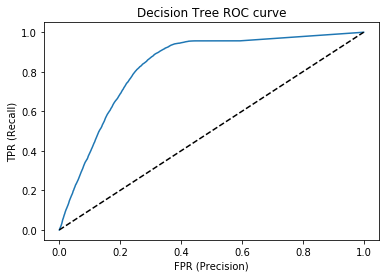

Area under curve (AUC):  0.82934


In [85]:

fpr, tpr, _ = roc_curve(y_test_fs, model.predict_proba(X_test_fs1)[:,1])

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

In [88]:
###KNN after sampling and fs
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit((X_train_fs1, Y_train_sampling)
    pred_i = knn.predict(X_test_fs1)
    error.append(np.mean(pred_i != y_test_fs))

SyntaxError: invalid syntax (<ipython-input-88-0a5346f90b1d>, line 8)